In [1]:
from models.Unet import UNet
from dataset.data import BatchMaker
from utils.metrics import SegmentationMetrics
import torch
import yaml
import numpy as np
import matplotlib.pyplot as plt



In [2]:
BATCH = 1
path_to_config = '/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Kod/config/config_lab.yaml'
with open(path_to_config, 'r') as config_file:
    config = yaml.safe_load(config_file)
model_path = config['save_model_path'] + '/mixedGT1_best_model'


annotator1 = BatchMaker(config_path=path_to_config, batch_size=BATCH, mode = 'all',segment = 'mixed',annotator= 1)
train_GT1 = annotator1.train_loader
annotator2 = BatchMaker(config_path=path_to_config, batch_size=BATCH, mode = 'all',segment = 'mixed',annotator= 2)
train_GT2 = annotator2.train_loader

/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/train
/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/test_small
/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/test
/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/train
/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/test_small
/media/cal314-1/9E044F59044F3415/Marcin/noisy_labels/Dataset/SegSperm/test


torch.Size([1, 512, 512])


TypeError: Invalid shape (1, 512, 512) for image data

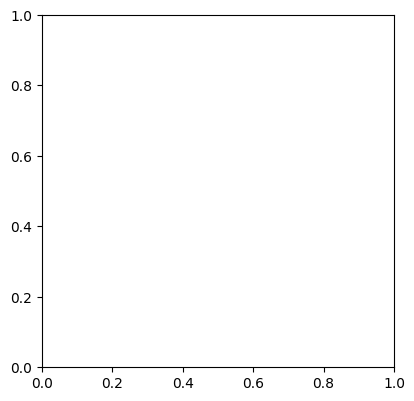

In [26]:
from sklearn.metrics import (
    jaccard_score,
    average_precision_score
)
from utils.metrics import SegmentationMetrics
import seaborn as sns
from sklearn.metrics import average_precision_score


input_images = []
class_masks = []
true_masks = []  

input_images1 = []
class_masks1 = []
true_masks1 = []  
all_true_class_ids = []
all_pred_class_ids = []


for inputs,ids in train_GT1:
    input_images.append(inputs) 
    class_masks.append(ids)

input_images = np.concatenate(input_images, axis=0)
class_masks = np.concatenate(class_masks, axis=0) 


for inputs, ids in train_GT2:
    input_images1.append(inputs)
    class_masks1.append(ids)

input_images1 = np.concatenate(input_images1, axis=0)
class_masks1 = np.concatenate(class_masks1, axis=0) 

#input_images1 = input_images1.transpose((0, 2, 3, 1))

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(class_masks[2])
plt.subplot(1, 2, 2)
plt.imshow(class_masks1[2])
plt.axis('off')


metrics = SegmentationMetrics(3)
metrics.update_confusion_matrix(class_masks, class_masks1)
iou_per_class = metrics.calculate_iou_per_class()
mean_iou = metrics.mean_iou()
accuracy = metrics.calculate_accuracy()
cnfMatrix = metrics.confusion_matrix
precision,recall,f1 = metrics.calculate_precision_recall_f1_per_class()
dice = metrics.calculate_dice_score_per_class()
print("IoU scores for each class:", iou_per_class)
print("Mean IoU score:", mean_iou)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
print("Dice:", dice)


plt.figure(figsize=(7,5))  
sns.heatmap(cnfMatrix[1:,1:], annot=True, fmt=".0f", cmap='Blues')  # Format numbers
plt.title('Confusion Matrix')  
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

plt.figure(figsize=(7,5))
plt.plot(precision[1],recall[1], 'o', label='class 1')






In [21]:
import numpy as np
from sklearn.metrics import average_precision_score

# Assume class_masks and class_masks1 are numpy arrays of shape (num_samples, height, width, num_classes)

num_classes = 3

# Initialize a list to store the AP for each class
average_precisions = []
print(class_masks.shape)

# Calculate AP for each class
for c in range(num_classes):
    y_true = class_masks[..., c].flatten().reshape(-1, 1)
    y_pred = class_masks1[..., c].flatten().reshape(-1, 1)
    ap = average_precision_score(y_true, y_pred)
    average_precisions.append(ap)

# Now average_precisions contains the AP for each class
for i, ap in enumerate(average_precisions):
    print(f"Average Precision for class {i}: {ap}")

# If you want the mean Average Precision (mAP) across all classes
mAP = np.mean(average_precisions)
print("Mean Average Precision across all classes:", mAP)

(432, 512, 512)
Average Precision for class 0: 0.9963485595880568
Average Precision for class 1: 0.995649221402121
Average Precision for class 2: 0.995072164389411
Mean Average Precision across all classes: 0.9956899817931962


In [4]:
all_true_class_ids.shape

(113246208,)